## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)


print(mouse_metadata_df.head())
print(study_results_df.head())


# Combine the data into a single dataset

combined_mice_df = pd.merge(mouse_metadata_df, study_results_df,
                                 how='outer', on='Mouse ID')
combined_mice_df.head(20)



  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#mean
drug_mean = combined_mice_df.groupby('Drug Regimen').mean()
drug_mean = drug_mean['Tumor Volume (mm3)']
#drug_mean

drug_median = combined_mice_df.groupby('Drug Regimen').median()
drug_median= drug_median['Tumor Volume (mm3)']
#DrugMedian

drug_std = combined_mice_df.groupby('Drug Regimen').std()
drug_std= drug_std['Tumor Volume (mm3)']
#DrugStd

drug_SEM = combined_mice_df.groupby('Drug Regimen').sem()
drug_SEM= drug_SEM['Tumor Volume (mm3)']
#DrugSEM

drug_sum_df = pd.DataFrame({"Mean": drug_mean,
                          "Median":drug_median,
                          "StandardDev": drug_std,
                          "SEM": drug_SEM})
drug_sum_df
       

                       

,Mean,Median,StandardDev,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar plots

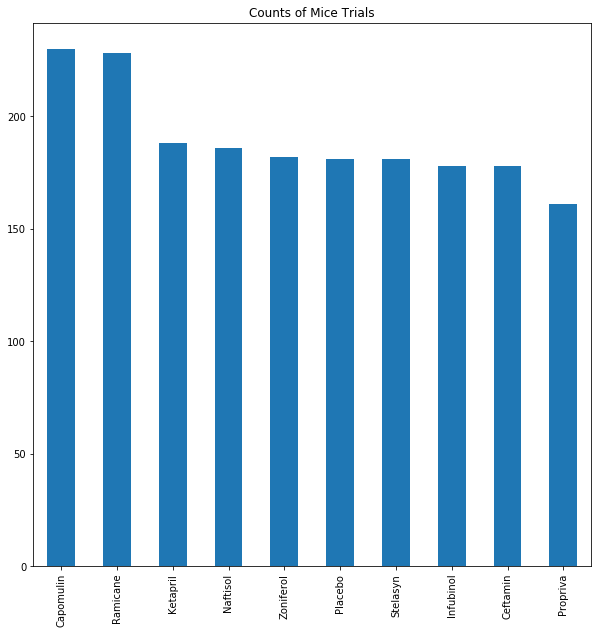

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

mice_counts = combined_mice_df['Drug Regimen'].value_counts() 


# Use DataFrame.plot() in order to create a bar chart of the data
mice_counts.plot(kind="bar", figsize=(10,10))

# Set a title for the chart
plt.title("Counts of Mice Trials")

plt.show()


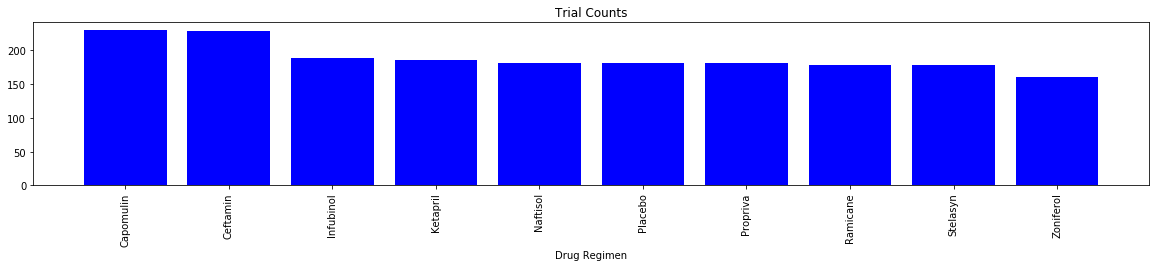

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

drug_name_reset = drug_sum_df.reset_index()

# Set x axis and tick locations
x_axis = np.arange(len(mice_counts))
tick_locations = [value for value in x_axis]    

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, mice_counts.values, color='b', alpha= 1.0, align="center")

#Show Names for drugs
plt.xticks(tick_locations, drug_name_reset["Drug Regimen"], rotation="vertical")


#plt.xticks(rotation= "vertical")

# Set a Title and labels
plt.title("Trial Counts")
plt.xlabel("Drug Regimen")
#plt.ylabel("Average Amount of Rainfall in Inches")

plt.show()




## Pie plots

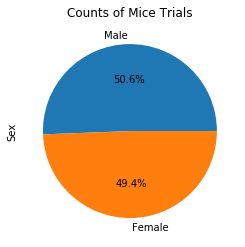

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#value count on gender column
mice_counts = combined_mice_df['Sex'].value_counts() 


# Use DataFrame.plot() in order to create a bar chart of the data
mice_counts.plot(kind="pie", autopct="%1.1f%%")

# Set a title for the chart
plt.title("Counts of Mice Trials")

plt.show()




<function matplotlib.pyplot.show(*args, **kw)>

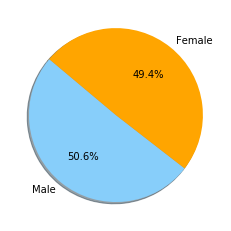

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Automatically finds the percentages of each part of the pie chart
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The colors of each section of the pie chart
colors = ["lightskyblue", "orange"]


plt.pie(mice_counts.values, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show


## Quartiles, outliers and boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#import scipy.stats as sts (Already done)

#final tumor volue of each mouse across four of the most primising treatment regimens.
#Find the max timepoint and rejoin this date to the previous df with combined data for tumor volume data set and drug regimen dataset.
combined_mice_group_max_df = combined_mice_df.groupby(["Mouse ID"]).max()

combined_mice_group_max_df = combined_mice_group_max_df.reset_index()

#print(combined_mice_group_max_df)

#Merge on Mouse ID and Timepoint - to get the actual volume at a given timepoint for a given mouse in a given treatment.
combined_max_df = combined_mice_group_max_df[['Mouse ID','Timepoint']].merge(combined_mice_df,
                                 how='left', on=['Mouse ID','Timepoint'])

#print(combined_max_df.head(20))

#Filter for Drug Choice for stats (Need 4 total)
#XXXXXXXX
rows_capomulin_all_df = combined_max_df.loc[combined_max_df["Drug Regimen"]== "Capomulin"]
print(rows_capomulin_all_df)

tumor_vol_capomulin_df = rows_capomulin_all_df["Tumor Volume (mm3)"]
print(tumor_vol_capomulin_df) 


# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tumor_vol_capomulin_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Do 3 additional drugs
 ###
    
    

# No Outliers on Capomulin

    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
19      b128         45    Capomulin  Female           9          22   
24      b742         45    Capomulin    Male           7          21   
61      f966         20    Capomulin    Male          16          17   
64      g288         45    Capomulin    Male           3          19   
66      g316         45    Capomulin  Female          22          22   
81      i557         45    Capomulin  Female           1          24   
84      i738         45    Capomulin  Female          23          20   
86      j119         45    Capomulin  Female           7          23   
88      j246         35    Capomulin  Female          21          21   
109     l509         45    Capomulin    Male          17          21   
116     l897         45    Capomulin    Male          17          19   
122     m601         45    Capomulin    Male          22          17   
125     m957         45    Capomulin  Female           3        

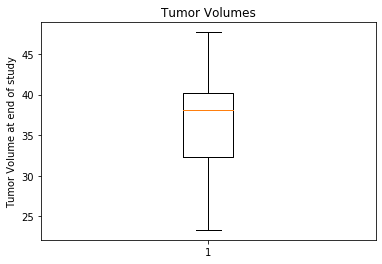

The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumors = tumor_vol_capomulin_df

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes')
ax1.set_ylabel('Tumor Volume at end of study')
ax1.boxplot(tumors)
plt.show()

quartiles = tumor_vol_capomulin_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")







## Line and scatter plots

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14 

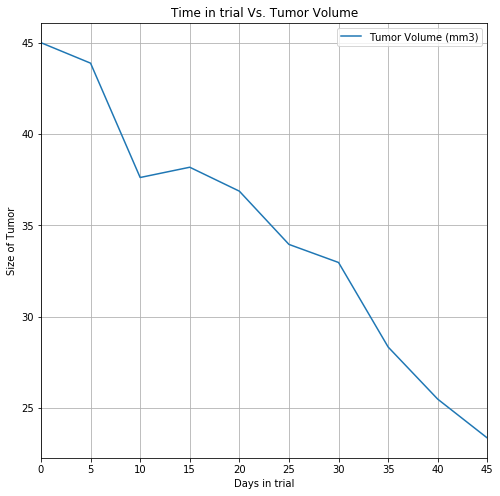

In [53]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

combined_mice_df 

mice_capomulin_tx = combined_mice_df.loc[combined_mice_df["Drug Regimen"]== "Capomulin"]

#print(mice_capomulin_tx)
#select Mouse s185

s185_data = combined_mice_df.loc[combined_mice_df["Mouse ID"]== "s185"]

print(s185_data)

# Create a scatter plot which compares Timepoint to Tumor Volume (mm3)
s185_data.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Time in trial Vs. Tumor Volume")
plt.xlabel("Days in trial")
plt.ylabel("Size of Tumor")
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

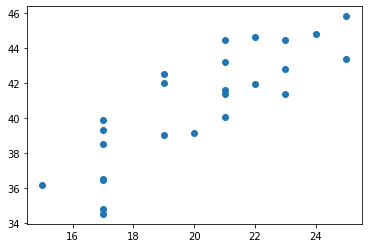

In [58]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mice_capomulin_tx = combined_mice_df.loc[combined_mice_df["Drug Regimen"]== "Capomulin"]

groupby = mice_capomulin_tx.groupby(["Mouse ID"]).mean()

#print(groupby)

plt.scatter(groupby["Weight (g)"], groupby["Tumor Volume (mm3)"])

plt.show

The correlation between both factors is 0.84


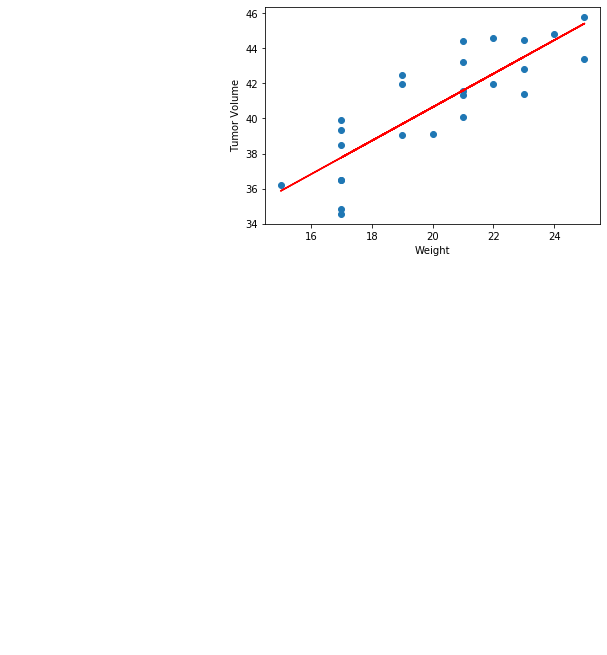

In [63]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen



#Print a corl number SciPy 
#st.pearsonr
correlation = st.pearsonr(groupby["Weight (g)"], groupby["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")



#Print a chart Scatter with a regression fit to it. lin-regress 

x_values = groupby["Weight (g)"]
y_values = groupby["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

